The Cross-Correlation package is available on github: https://github.com/keflavich/image_registration.

The goal is to determine the offset between two images with primarily extended structure.

In [1]:
import warnings
import pylab as pl
# import statement (with warnings silenced).   
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    import image_registration
errmsgs = np.seterr(all='ignore') # silence warning messages about div-by-zero
from turbustat.simulator.gen_field import make_extended

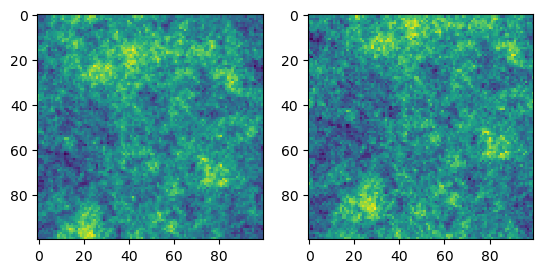

In [2]:
# create a simulated image by randomly sampling from a power-law power spectrum with alpha=2
im1 = image_registration.tests.make_extended(100)
im1 = make_extended(100)
# create an offset version corrupted by noise
im2 = image_registration.tests.make_offset_extended(im1, 4.76666, -12.33333333333333333333333, noise=0.1)
pl.subplot(121); img1=pl.imshow(im1, cmap='viridis', interpolation='nearest')
pl.subplot(122); img2=pl.imshow(im2, cmap='viridis', interpolation='nearest')

In [3]:
# Run the registration methods 100 times each (and hide the output)
offsets_n1,eoffsets_n1 = image_registration.tests.compare_methods(im1,im2,noise=0.1)

Standard Deviations:  [0. 0. 0. 0. 0. 0. 0. 0.]
Error Means:  [0.00497512 0.00497512 0.01567028 0.01510755 0.         0.
 0.00390625 0.00390625]
emeans/stds:  [inf inf inf inf nan nan inf inf]


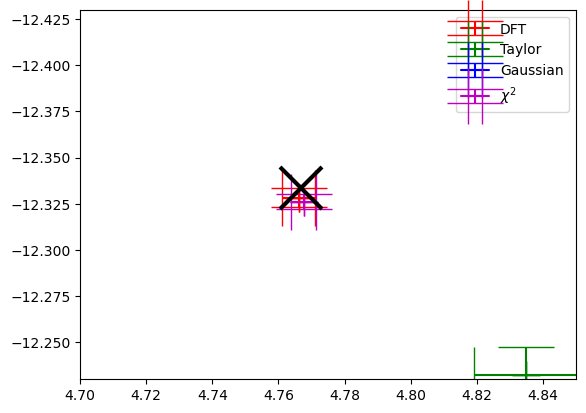

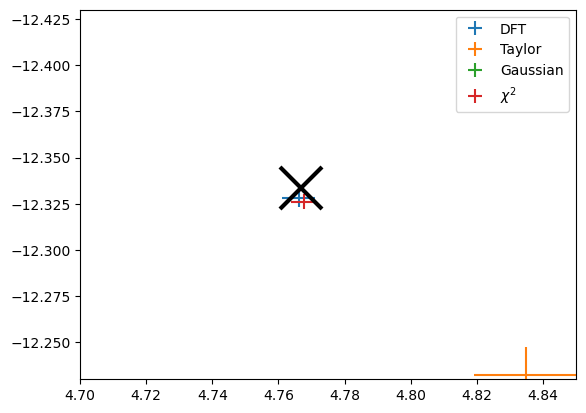

In [4]:
# plot the simulation data
# (note that the "gaussian" approach is hidden; it was problematic)
image_registration.tests.plot_compare_methods(offsets_n1,eoffsets_n1,dx=4.76666666,dy=-12.3333333333)
pl.figure(2); ax=pl.axis([4.7,4.85,-12.23,-12.43])
pl.figure(1); ax=pl.axis([4.7,4.85,-12.23,-12.43])
# the outputs below show the x,y standard deviations (i.e., the "simulated error"), 
# the means of the reported errors (i.e., the measured errors)
# and the ratio of the measured error to the simulated error - should be ~1 if correct
# the black X is the correct answer

Standard Deviations:  [0. 0. 0. 0. 0. 0. 0. 0.]
Error Means:  [0.00497512 0.00497512 0.01567028 0.01510755 0.         0.
 0.00390625 0.00390625]
emeans/stds:  [inf inf inf inf nan nan inf inf]


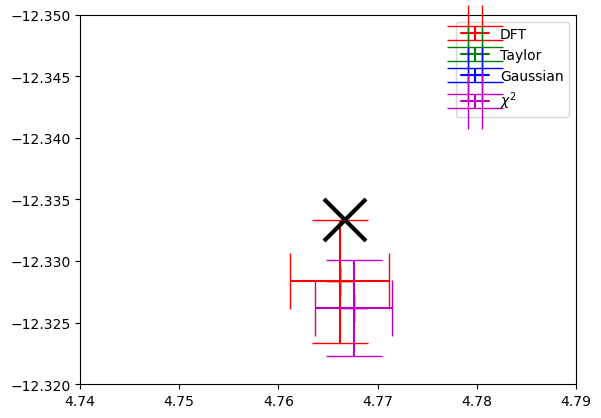

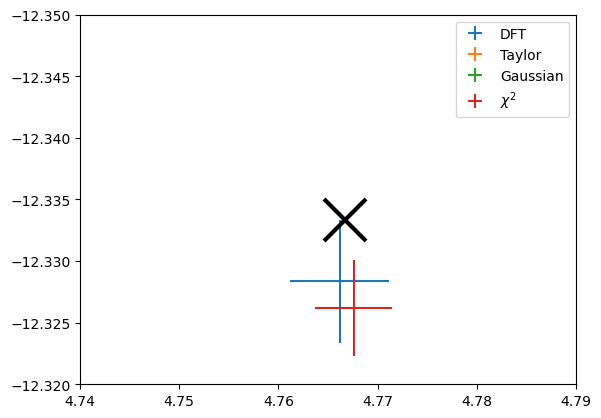

In [5]:
# plot the simulation data but zoomed in more (same as above otherwise)
# (note that the "gaussian" approach is hidden; it was problematic)
image_registration.tests.plot_compare_methods(offsets_n1,eoffsets_n1,dx=4.76666666,dy=-12.3333333333)
pl.figure(2); ax=pl.axis([4.74,4.79,-12.32,-12.35])
pl.figure(1); ax=pl.axis([4.74,4.79,-12.32,-12.35])
# the outputs below show the x,y standard deviations (i.e., the "simulated error"), 
# the means of the reported errors (i.e., the measured errors)
# and the ratio of the measured error to the simulated error - should be ~1 if correct
# the black X is the correct answer

So how do these methods work?
They all use the peak of the cross-correlation, which is most efficiently done via fourier transforms,
to determine the offset.

The "cross_correlation_shift" function selects the cross-correlation peak, then finds the sub-pixel shift using
a second order Taylor expansion.

The "register_images" function uses some linear algebra + fourier space tricks to upsample the image to determine 
sub-pixel shifts.

The "chi2_shift" function uses the same trick, but "automatically" determines the upsampling factor based on the 
$\Delta \chi^2$ values.  The peak is identified, as is a region within $1\sigma$ (for 2 fitted parameters, 
$\Delta \chi^2<2.3$ , then the original image is magnified to include only the $1\sigma$ region.  
The errors are determined by marginalizing over the other fitted parameter, BUT it is possible to return the full
$\Delta \chi^2$ image if you are concerned with correlation.